#Avaliação de Risco de Crédito
Uma das área que causa mais problemas para bancos, financiadoras e empresários é a **taxa de inadimplência** por parte da sua carteira de clientes.

**Avaliar se a pessoa irá deixar de cumprir com suas obrigações financeiras** é de extrema importância, e pode causar um grande impacto no balanço da Instituição. Cada vez mais, soluções vêm sendo desenvolvidas e aprimoradas visando minimizar o risco de default.

**Default** é o termo utilizado para indicar o não cumprimento das obrigações e/ou condições de um empréstimo (como financiamentos ou dívidas de cartão de crédito). Normalmente, o principal motivo para o descumprimento das condições de pagamento é incapacidade financeira do cliente.



#O Contexto do problema
 Qual a probabilidade do cliente de uma instituição financeira não cumprir com suas obrigações financeiras e deixando de pagar a sua fatura do Cartão de Crédito.

**Objetivo do projeto: Criar um modelo usando Machine Learning que forneça a probabilidade de um cliente virar inadimplente.**

#Importar os dados
A Base de Dados foi utilizada e retirada do site kaggle,os dados estão arquivo csv contendo **32.581** **entradas**  com **12 colunas**.

In [ ]:
# instalar os pacotes necessários
! pip install -q scikit-plot

In [ ]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import QuantileTransformer, PowerTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, f1_score, make_scorer
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB, CategoricalNB
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB


# filtrar mensagens de aviso
import warnings
warnings.filterwarnings('ignore')


In [ ]:
dados=pd.read_csv('/content/drive/MyDrive/TCC/credit_risk.csv', sep=',',encoding='utf-8')

In [ ]:
display(dados)

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


#Analise exploratoria dos dados

In [ ]:
# Ver o tamanho da Base de Dados
print(f'A Base de Dados possui {dados.shape[0]} entradas e {dados.shape[1]} colunas')

A Base de Dados possui 32581 entradas e 12 colunas


In [ ]:
# Ver o nome das colunas
print(f'\n Nome das Colunas são:\n {dados.columns.values}')


 Nome das Colunas são:
 ['Id' 'Age' 'Income' 'Home' 'Emp_length' 'Intent' 'Amount' 'Rate' 'Status'
 'Percent_income' 'Default' 'Cred_length']


In [ ]:
dados.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [ ]:
dados.describe()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,32581.000000,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,16290.006139,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,9405.479594,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8145.000000,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16290.000000,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24435.000000,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,32780.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
# Ver os tipos de dados das colunas
print(f'\n Tipos de Dados das colunas:\n {dados.dtypes}')


 Tipos de Dados das colunas:
 Id                  int64
Age                 int64
Income              int64
Home               object
Emp_length        float64
Intent             object
Amount              int64
Rate              float64
Status              int64
Percent_income    float64
Default            object
Cred_length         int64
dtype: object


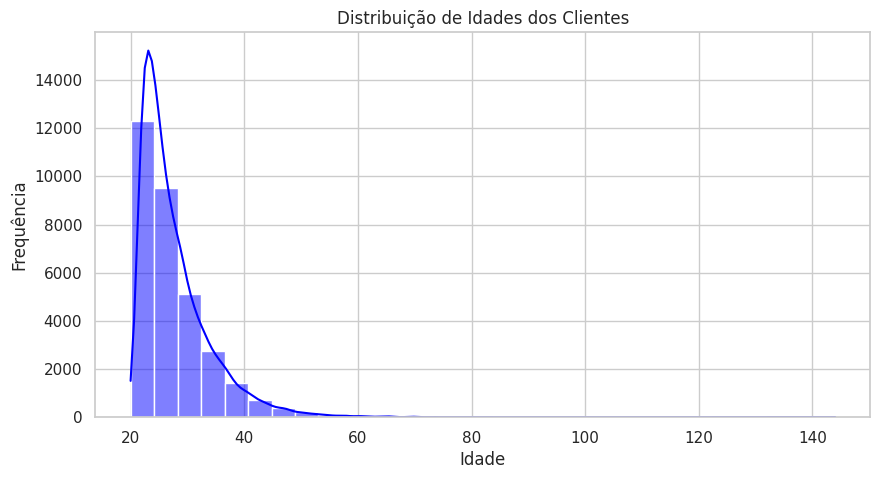

In [ ]:
sns.set(style="whitegrid")

# Plot histogram for Age distribution
plt.figure(figsize=(10, 5))
sns.histplot(dados['Age'], bins=30, kde=True, color='blue')
plt.title('Distribuição de Idades dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

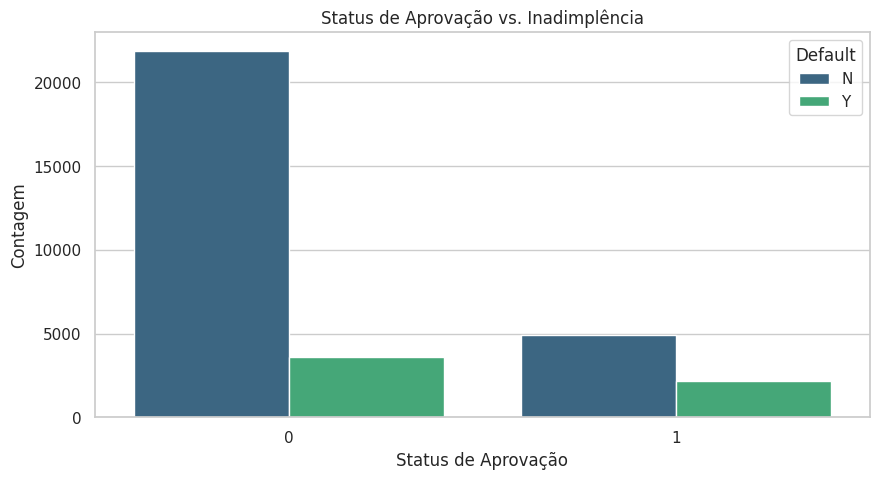

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Status', hue='Default', data=dados, palette='viridis')
plt.title('Status de Aprovação vs. Inadimplência')
plt.xlabel('Status de Aprovação')
plt.ylabel('Contagem')
plt.show()

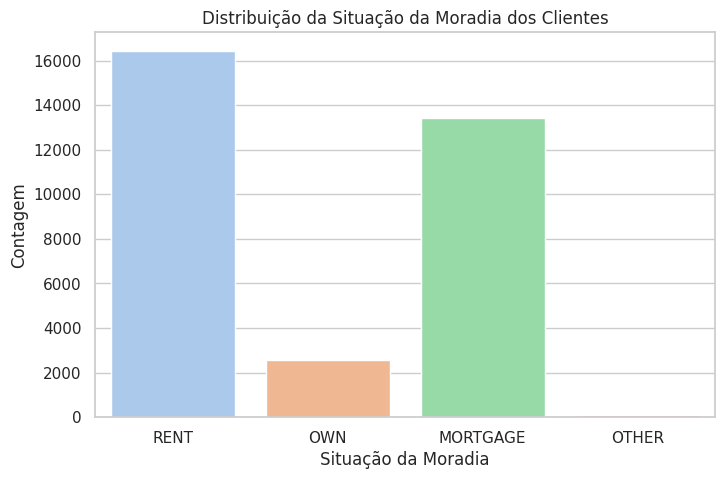

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Home', data=dados, palette='pastel')
plt.title('Distribuição da Situação da Moradia dos Clientes')
plt.xlabel('Situação da Moradia')
plt.ylabel('Contagem')
plt.show()

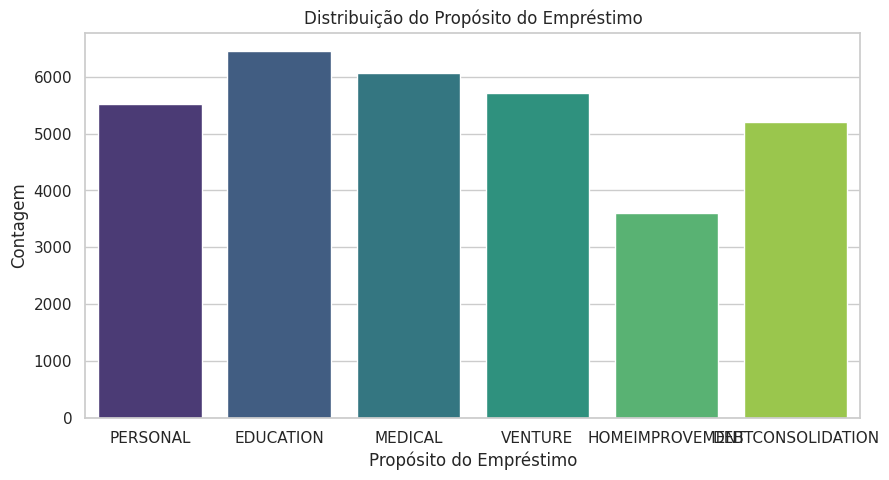

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Intent', data=dados, palette='viridis')
plt.title('Distribuição do Propósito do Empréstimo')
plt.xlabel('Propósito do Empréstimo')
plt.ylabel('Contagem')
plt.show()

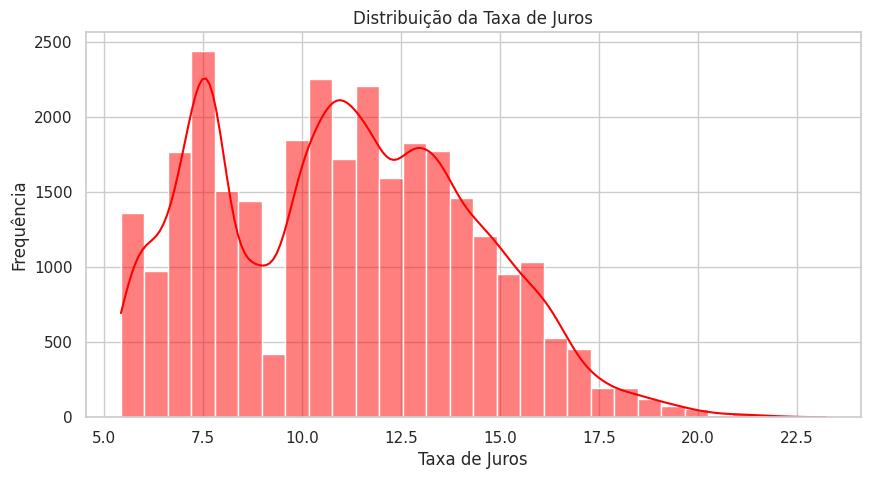

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(dados['Rate'].dropna(), bins=30, kde=True, color='red')
plt.title('Distribuição da Taxa de Juros')
plt.xlabel('Taxa de Juros')
plt.ylabel('Frequência')
plt.show()


#Limpeza dos dados ausentes

In [ ]:
# Ver a quantidade de valores ausentes
print(f'Porcentagem dos dados ausentes:\t \n {dados.isnull().sum() / dados.shape[0]}')

Porcentagem dos dados ausentes:	 
 Id                0.000000
Age               0.000000
Income            0.000000
Home              0.000000
Emp_length        0.027470
Intent            0.000000
Amount            0.000000
Rate              0.095639
Status            0.000000
Percent_income    0.000000
Default           0.000000
Cred_length       0.000000
dtype: float64


In [ ]:
# Ver os valores únicos por coluna
print(f'\n Valores únicos (por coluna) \n {dados.nunique().sort_values()}')


 Valores únicos (por coluna) 
 Status                2
Default               2
Home                  4
Intent                6
Cred_length          29
Emp_length           36
Age                  58
Percent_income       77
Rate                348
Amount              753
Income             4295
Id                32581
dtype: int64


In [ ]:
# Verificar a presença de valores ausentes
print(dados.isnull().sum())


# Selecionar apenas colunas numéricas para imputação
colunas_numericas = dados.select_dtypes(include=['float', 'int']).columns

# Criar um imputer para substituir valores ausentes pela mediana
imputer = SimpleImputer(strategy='median')
dados[colunas_numericas] = imputer.fit_transform(dados[colunas_numericas])

print(dados[colunas_numericas].isnull().sum())
dados_sem_na = dados.dropna()

# Verificar o tamanho do dataset após remoção de linhas com valores ausentes
print(dados_sem_na.shape)

Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64
Id                0
Age               0
Income            0
Emp_length        0
Amount            0
Rate              0
Status            0
Percent_income    0
Cred_length       0
dtype: int64
(32581, 12)


In [ ]:
# Checar a quantidade de valores ausentes
print(f'Porcentagem de dados ausentes:\t\n{dados.isnull().sum() / dados.shape[0]}')

Porcentagem de dados ausentes:	
Id                0.0
Age               0.0
Income            0.0
Home              0.0
Emp_length        0.0
Intent            0.0
Amount            0.0
Rate              0.0
Status            0.0
Percent_income    0.0
Default           0.0
Cred_length       0.0
dtype: float64


In [ ]:
dados.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0.0,22.0,59000.0,RENT,123.0,PERSONAL,35000.0,16.02,1.0,0.59,Y,3.0
1,1.0,21.0,9600.0,OWN,5.0,EDUCATION,1000.0,11.14,0.0,0.10,N,2.0
2,2.0,25.0,9600.0,MORTGAGE,1.0,MEDICAL,5500.0,12.87,1.0,0.57,N,3.0
3,3.0,23.0,65500.0,RENT,4.0,MEDICAL,35000.0,15.23,1.0,0.53,N,2.0
4,4.0,24.0,54400.0,RENT,8.0,MEDICAL,35000.0,14.27,1.0,0.55,Y,4.0


#Fazer o balanceamento dos dados

Index(['Id', 'Age', 'Income', 'Home', 'Emp_length', 'Intent', 'Amount', 'Rate',
       'Status', 'Percent_income', 'Default', 'Cred_length'],
      dtype='object')

Proporção entre Inadimplentes
Default
N    0.82367
Y    0.17633
Name: count, dtype: float64


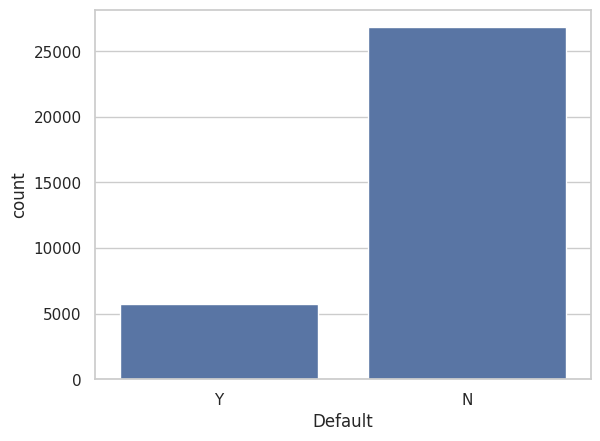

In [ ]:
# Verificar o balanceamento da variável alvo (Inadimplentes)
print(dados.columns)

print('\nProporção entre Inadimplentes')
print(dados['Default'].value_counts() / dados.shape[0])

sns.countplot(x='Default', data=dados)
plt.show()

Realizar o **LabelEncoding** para a possibilidade para que as variáveis categóricas sejam codificadas em valores únicos, podendo assim utilizando de treinamento para os modelos de Machine learning.

In [ ]:
dados_clean = dados.copy()  # Criar uma copia para não modificaro original

cat_cols = dados_clean.select_dtypes('object').columns

for col in cat_cols:
  dados_clean[col+'_encoded'] = LabelEncoder().fit_transform(dados_clean[col])
  dados_clean.drop(col, axis=1, inplace=True)

In [ ]:
dados_clean

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length,Home_encoded,Intent_encoded,Default_encoded
0,0.0,22.0,59000.0,123.0,35000.0,16.02,1.0,0.59,3.0,3,4,1
1,1.0,21.0,9600.0,5.0,1000.0,11.14,0.0,0.10,2.0,2,1,0
2,2.0,25.0,9600.0,1.0,5500.0,12.87,1.0,0.57,3.0,0,3,0
3,3.0,23.0,65500.0,4.0,35000.0,15.23,1.0,0.53,2.0,3,3,0
4,4.0,24.0,54400.0,8.0,35000.0,14.27,1.0,0.55,4.0,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576.0,57.0,53000.0,1.0,5800.0,13.16,0.0,0.11,30.0,0,4,0
32577,32577.0,54.0,120000.0,4.0,17625.0,7.49,0.0,0.15,19.0,0,4,0
32578,32578.0,65.0,76000.0,3.0,35000.0,10.99,1.0,0.46,28.0,3,2,0
32579,32579.0,56.0,150000.0,5.0,15000.0,11.48,0.0,0.10,26.0,0,4,0


#Separar em dois conjuntos de dados

Separar os dados em dois conjuntos en treino e teste para o aprendizado dos modelos Machine Learning.

In [ ]:

if 'Default_encoded' not in dados_clean.columns:
    if 'Default' in cat_cols:

        dados_clean['Default_encoded'] = LabelEncoder().fit_transform(dados_clean['Default'])
        # Remover a coluna original 'Default'
        dados_clean.drop('Default', axis=1, inplace=True)
else:
    print("A coluna 'Default' já está codificada.")

X = dados_clean.select_dtypes(exclude='object')
y = dados_clean['Default_encoded']  # Variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


A coluna 'Default' já está codificada.


#Importar modelos e realizar a Validação Cruzada



In [ ]:
# Carregando o dataset
X = np.array(X)
y = np.array(y)

#Lidar com valores ausentes usando SimpleImputer.
imputer = SimpleImputer(strategy='mean')  # Substituir valores ausentes pela média
X = imputer

In [ ]:
# Separar em teste e treino
X = dados.drop('Default', axis=1)
y = dados['Default']

# Indentificar as colunas categoricas
categorical_cols = X.select_dtypes(include=['object']).columns

#Codificar recursos categóricos.
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

#Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Balancear usando Random Under Sampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_scaled, y)

#Checar o balanceamento
print(pd.Series(y_resampled).value_counts())


Default
N    5745
Y    5745
Name: count, dtype: int64


In [ ]:
#Dividir os dados em conjuntos de treinamento e teste
X_train_rus_scaled, X_test_rus_scaled, y_train_rus_scaled, y_test_rus_scaled = train_test_split(
    X_resampled, y_resampled  , test_size=0.25, random_state=42)

In [ ]:
# Definindo funçao de validação com dados balanceados
def val_model_balanced(X, y,clf, quite=False):

  X = np.array(X)
  y = np.array(y)

  # Codificar a variável alvo se ela não for numérica.
  if y.dtype == object:  #Verificar se 'y' é do tipo objeto (provavelmente string)
    le = LabelEncoder()
    y = le.fit_transform(y)  # Codificar 'y' em rótulos numéricos

  scores = cross_val_score(clf, X, y, scoring='recall')

  if quite == False:
    print('Recall: {:.4f} (+/- {:.4f})'.format(scores.mean(), scores.std() * 2))
  return scores.mean()

#Definição dos modelos de machine learning
### Ver qual modelo se saiu melhor depois da validação cruzada

In [ ]:
#Definir os modelos
ran_for = RandomForestClassifier()
XGB_BOO = XGBClassifier()
log_reg = LogisticRegression()
NB = GaussianNB()

# printar o desempenho dos modelos com os dados padronizados
print('Cross-validation ran_for:')
score_testeRf     = val_model_balanced(X_train_rus_scaled, y_train_rus_scaled, ran_for)
print('\nCross-validation log_reg:')
score_testeLR     = val_model_balanced(X_train_rus_scaled, y_train_rus_scaled, log_reg)
print('\nCross-validation XGB_BOO:')
score_testeXGB    = val_model_balanced(X_train_rus_scaled, y_train_rus_scaled, XGB_BOO)
print('\nCross-validation Naive Bayes:')
score_testeNB     = val_model_balanced(X_train_rus_scaled, y_train_rus_scaled, NB)


Cross-validation ran_for:
Recall: 0.8898 (+/- 0.0184)

Cross-validation log_reg:
Recall: 0.8540 (+/- 0.0141)

Cross-validation XGB_BOO:
Recall: 0.8933 (+/- 0.0213)

Cross-validation Naive Bayes:
Recall: 0.8132 (+/- 0.0374)
